## Preprocessing Global TOA Data for Abrupt4XCO2

 Preprocessing global TOA data for abrupt4xCO2 and piControl simulations.


In [21]:
#imports
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D 
from scipy import stats
import cftime
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [22]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [23]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [24]:
def load_zarr_dset(df):
  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df.zstore.values[-1]

  # create a mutable-mapping-style interface to the store
  mapper = gcs.get_mapper(zstore)

  # open it using xarray and zarr
  ds = xr.open_zarr(mapper, consolidated=True)
  return ds

In [25]:
#time index to assign abrupt4xCO2 model times to
new_time_index_abrupt =pd.date_range('1850-01-01', '1999-12-31', freq='ME')
new_time_index_abrupt 

DatetimeIndex(['1850-01-31', '1850-02-28', '1850-03-31', '1850-04-30',
               '1850-05-31', '1850-06-30', '1850-07-31', '1850-08-31',
               '1850-09-30', '1850-10-31',
               ...
               '1999-03-31', '1999-04-30', '1999-05-31', '1999-06-30',
               '1999-07-31', '1999-08-31', '1999-09-30', '1999-10-31',
               '1999-11-30', '1999-12-31'],
              dtype='datetime64[ns]', length=1800, freq='ME')

In [26]:
#query all models for toa radiation variables for abrupt-4xCO2
#rlut
df_abrupt4xCO2_toa_rlut = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rlut' & experiment_id=='abrupt-4xCO2'")
#rsut
df_abrupt4xCO2_toa_rsut = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rsut' & experiment_id=='abrupt-4xCO2'")
#rsdt
df_abrupt4xCO2_toa_rsdt = df.query(  "activity_id=='CMIP'         & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id=='abrupt-4xCO2'")
#models
models_toa_abrupt4xCO2_rlut  = set(df_abrupt4xCO2_toa_rlut.source_id)
models_toa_abrupt4xCO2_rsut  = set(df_abrupt4xCO2_toa_rsut.source_id)
models_toa_abrupt4xCO2_rsdt  = set(df_abrupt4xCO2_toa_rsdt.source_id)

#intersection of all of the models that have all radiation types
source_set_abrupt4xCO2 = set.intersection(models_toa_abrupt4xCO2_rlut, models_toa_abrupt4xCO2_rsut, models_toa_abrupt4xCO2_rsdt)
source_list_abrupt4xCO2 = list(source_set_abrupt4xCO2)
print(len(source_set_abrupt4xCO2))

50


In [27]:
#query all models for toa radiation variables for abrupt-4xCO2 w/ r1i1p1f1
#rlut
df_abrupt4xCO2_toa_rlut = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id=='abrupt-4xCO2'")
#rsut
df_abrupt4xCO2_toa_rsut = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id=='abrupt-4xCO2'")
#rsdt
df_abrupt4xCO2_toa_rsdt = df.query(  "activity_id=='CMIP' & member_id == 'r1i1p1f1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id=='abrupt-4xCO2'")
#models
models_toa_abrupt4xCO2_rlut  = set(df_abrupt4xCO2_toa_rlut.source_id)
models_toa_abrupt4xCO2_rsut  = set(df_abrupt4xCO2_toa_rsut.source_id)
models_toa_abrupt4xCO2_rsdt  = set(df_abrupt4xCO2_toa_rsdt.source_id)

#intersection of all of the models that have all radiation types
source_set_abrupt4xCO2_2 = set.intersection(models_toa_abrupt4xCO2_rlut, models_toa_abrupt4xCO2_rsut, models_toa_abrupt4xCO2_rsdt)
source_list_abrupt4xCO2_2 = list(source_set_abrupt4xCO2_2)
print(len(source_list_abrupt4xCO2_2))

42


In [28]:
#remove models
model_list = [ 'CMCC-CM2-SR5',
              'CAMS-CSM1-0',
               'KACE-1-0-G',
               'MPI-ESM-1-2-HAM',
               'EC-Earth3-AerChem',
               'FGOALS-g3',
               'IITM-ESM',
               'CIESM',
               'CAS-ESM2-0']


In [29]:
for source in model_list:
    if source in source_list_abrupt4xCO2_2:
        source_list_abrupt4xCO2_2.remove(source)
print(len(source_list_abrupt4xCO2_2))
print(source_list_abrupt4xCO2_2)

33
['CESM2-WACCM', 'BCC-ESM1', 'CanESM5', 'GISS-E2-1-H', 'BCC-CSM2-MR', 'AWI-CM-1-1-MR', 'GFDL-ESM4', 'E3SM-1-0', 'NESM3', 'NorCPM1', 'GFDL-CM4', 'FGOALS-f3-L', 'KIOST-ESM', 'CESM2-FV2', 'TaiESM1', 'CESM2-WACCM-FV2', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'EC-Earth3-Veg', 'SAM0-UNICON', 'IPSL-CM6A-LR', 'NorESM2-MM', 'FIO-ESM-2-0', 'INM-CM5-0', 'CMCC-ESM2', 'GISS-E2-1-G', 'ACCESS-ESM1-5', 'MRI-ESM2-0', 'CESM2', 'INM-CM4-8', 'GISS-E2-2-G', 'MIROC6', 'ACCESS-CM2']


### 1.1 Look at One Model

In [16]:
#query data
#query data
#abrupt4xCO2 data
df_toa_abrupt4xCO2_noresm_rlut = df.query(  "activity_id=='CMIP' & source_id == 'NorESM2-MM' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id=='abrupt-4xCO2' & member_id == 'r1i1p1f1'")
df_toa_abrupt4xCO2_noresm_rsut = df.query(  "activity_id=='CMIP' & source_id == 'NorESM2-MM' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id=='abrupt-4xCO2' & member_id == 'r1i1p1f1'")
df_toa_abrupt4xCO2_noresm_rsdt = df.query(  "activity_id=='CMIP' & source_id == 'NorESM2-MM' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id=='abrupt-4xCO2' & member_id == 'r1i1p1f1'")
#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_noresm_rlut = load_zarr_dset(df_toa_abrupt4xCO2_noresm_rlut)
ds_toa_abrupt4xCO2_noresm_rsut = load_zarr_dset(df_toa_abrupt4xCO2_noresm_rsut)
ds_toa_abrupt4xCO2_noresm_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_noresm_rsdt)

ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_noresm_rsdt.rsdt - ds_toa_abrupt4xCO2_noresm_rsut.rsut - ds_toa_abrupt4xCO2_noresm_rlut.rlut

#weights
weights = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
ds_toa_noresm = ds_abrupt4xCO2_toa.weighted(weights).mean(dim=('lon', 'lat'))
#slice to specific period and reassign new time index
ds_toa_noresm = ds_toa_noresm.isel(time=slice(0,3000))

#check ds
ds_toa_noresm

<xarray.DataArray (time: 1800)>
dask.array<truediv, shape=(1800,), dtype=float64, chunksize=(330,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00

Text(0.5, 1.0, 'NorESM2-MM Global TOA')

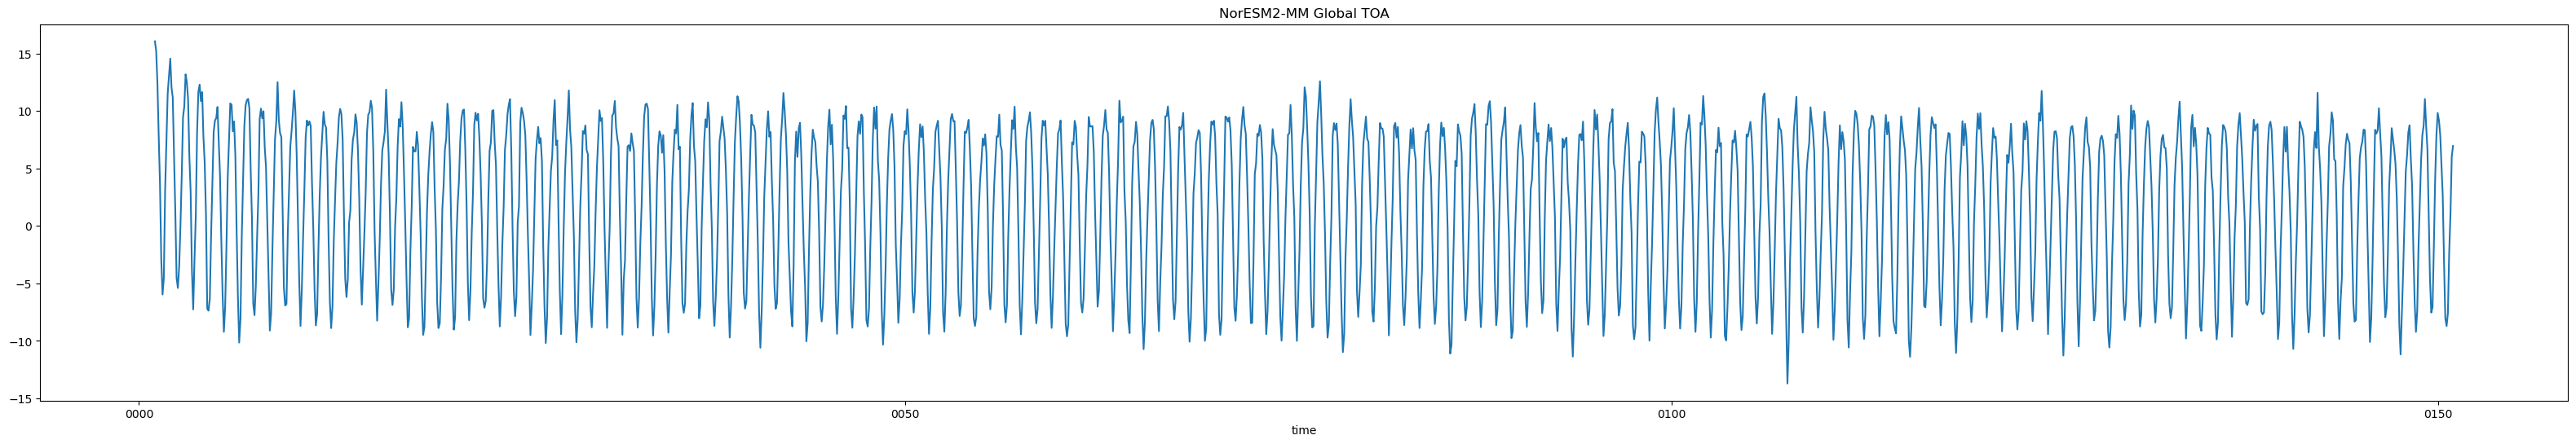

In [17]:
fig, ax = plt.subplots(figsize = (40,6))
ds_toa_noresm.plot(ax=ax)
plt.title("NorESM2-MM Global TOA")

### 1.2 Loading Multiple Models

In [32]:
gcm_list = ['CESM2-WACCM', 'BCC-ESM1', 'CanESM5', 'GISS-E2-1-H', 'BCC-CSM2-MR']

In [51]:
#TOA dtarray of 5 GCM
ds_list_abrupt_gcm = list()
ds_list_piControl_gcm = list()
for source in gcm_list:
    #abrupt4xCO2 data
    df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")

    #load abrupt4xCO2 data as dataset
    ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
    ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
    ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
    ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
    ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
    #toa and cre variable
    ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
    ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

    #check each coords to see if lat/latitude need to be renamed
    #print(source)
    #print(ds_abrupt4xCO2_toa.coords)

    #piControl data
    df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")

    #load piControl data as dataset
    ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
    ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
    ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
    ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
    ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
    #toa and cre variable
    ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
    ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
    ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

    #check coords for piControl to see if lat/latitude need to be renamed
    #print(source)
    #print(ds_piControl_toa.coords)
    
    #weights for toa and cre (combine at the end)
    weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
    weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
    ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
    weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
    weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
    ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
    ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

    #ds_toa combined
    ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
    #piControl combined
    ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
    #slice and assign
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
    ds_list_abrupt_gcm.append(ds_abrupt4xCO2_toa_cre_merged)
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
    ds_list_piControl_gcm.append(ds_piControl_toa_cre_merged)
    
ds_abrupt_gcm_models = xr.concat(ds_list_abrupt_gcm, dim = 'model', coords = 'minimal', compat = 'override')
ds_piControl_gcm_models = xr.concat(ds_list_piControl_gcm, dim = 'model', coords = 'minimal', compat = 'override')
ds_abrupt_gcm_models


<xarray.Dataset>
Dimensions:  (time: 1800, model: 5)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 1999-12-31
  * model    (model) <U11 'CESM2-WACCM' 'BCC-ESM1' ... 'BCC-CSM2-MR'
Data variables:
    toa      (model, time) float64 dask.array<chunksize=(1, 488), meta=np.ndarray>
    cre      (model, time) float64 dask.array<chunksize=(1, 244), meta=np.ndarray>

In [52]:
ds_piControl_gcm_models

<xarray.Dataset>
Dimensions:  (time: 1800, model: 5)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 1999-12-31
  * model    (model) <U11 'CESM2-WACCM' 'BCC-ESM1' ... 'BCC-CSM2-MR'
Data variables:
    toa      (model, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    cre      (model, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>

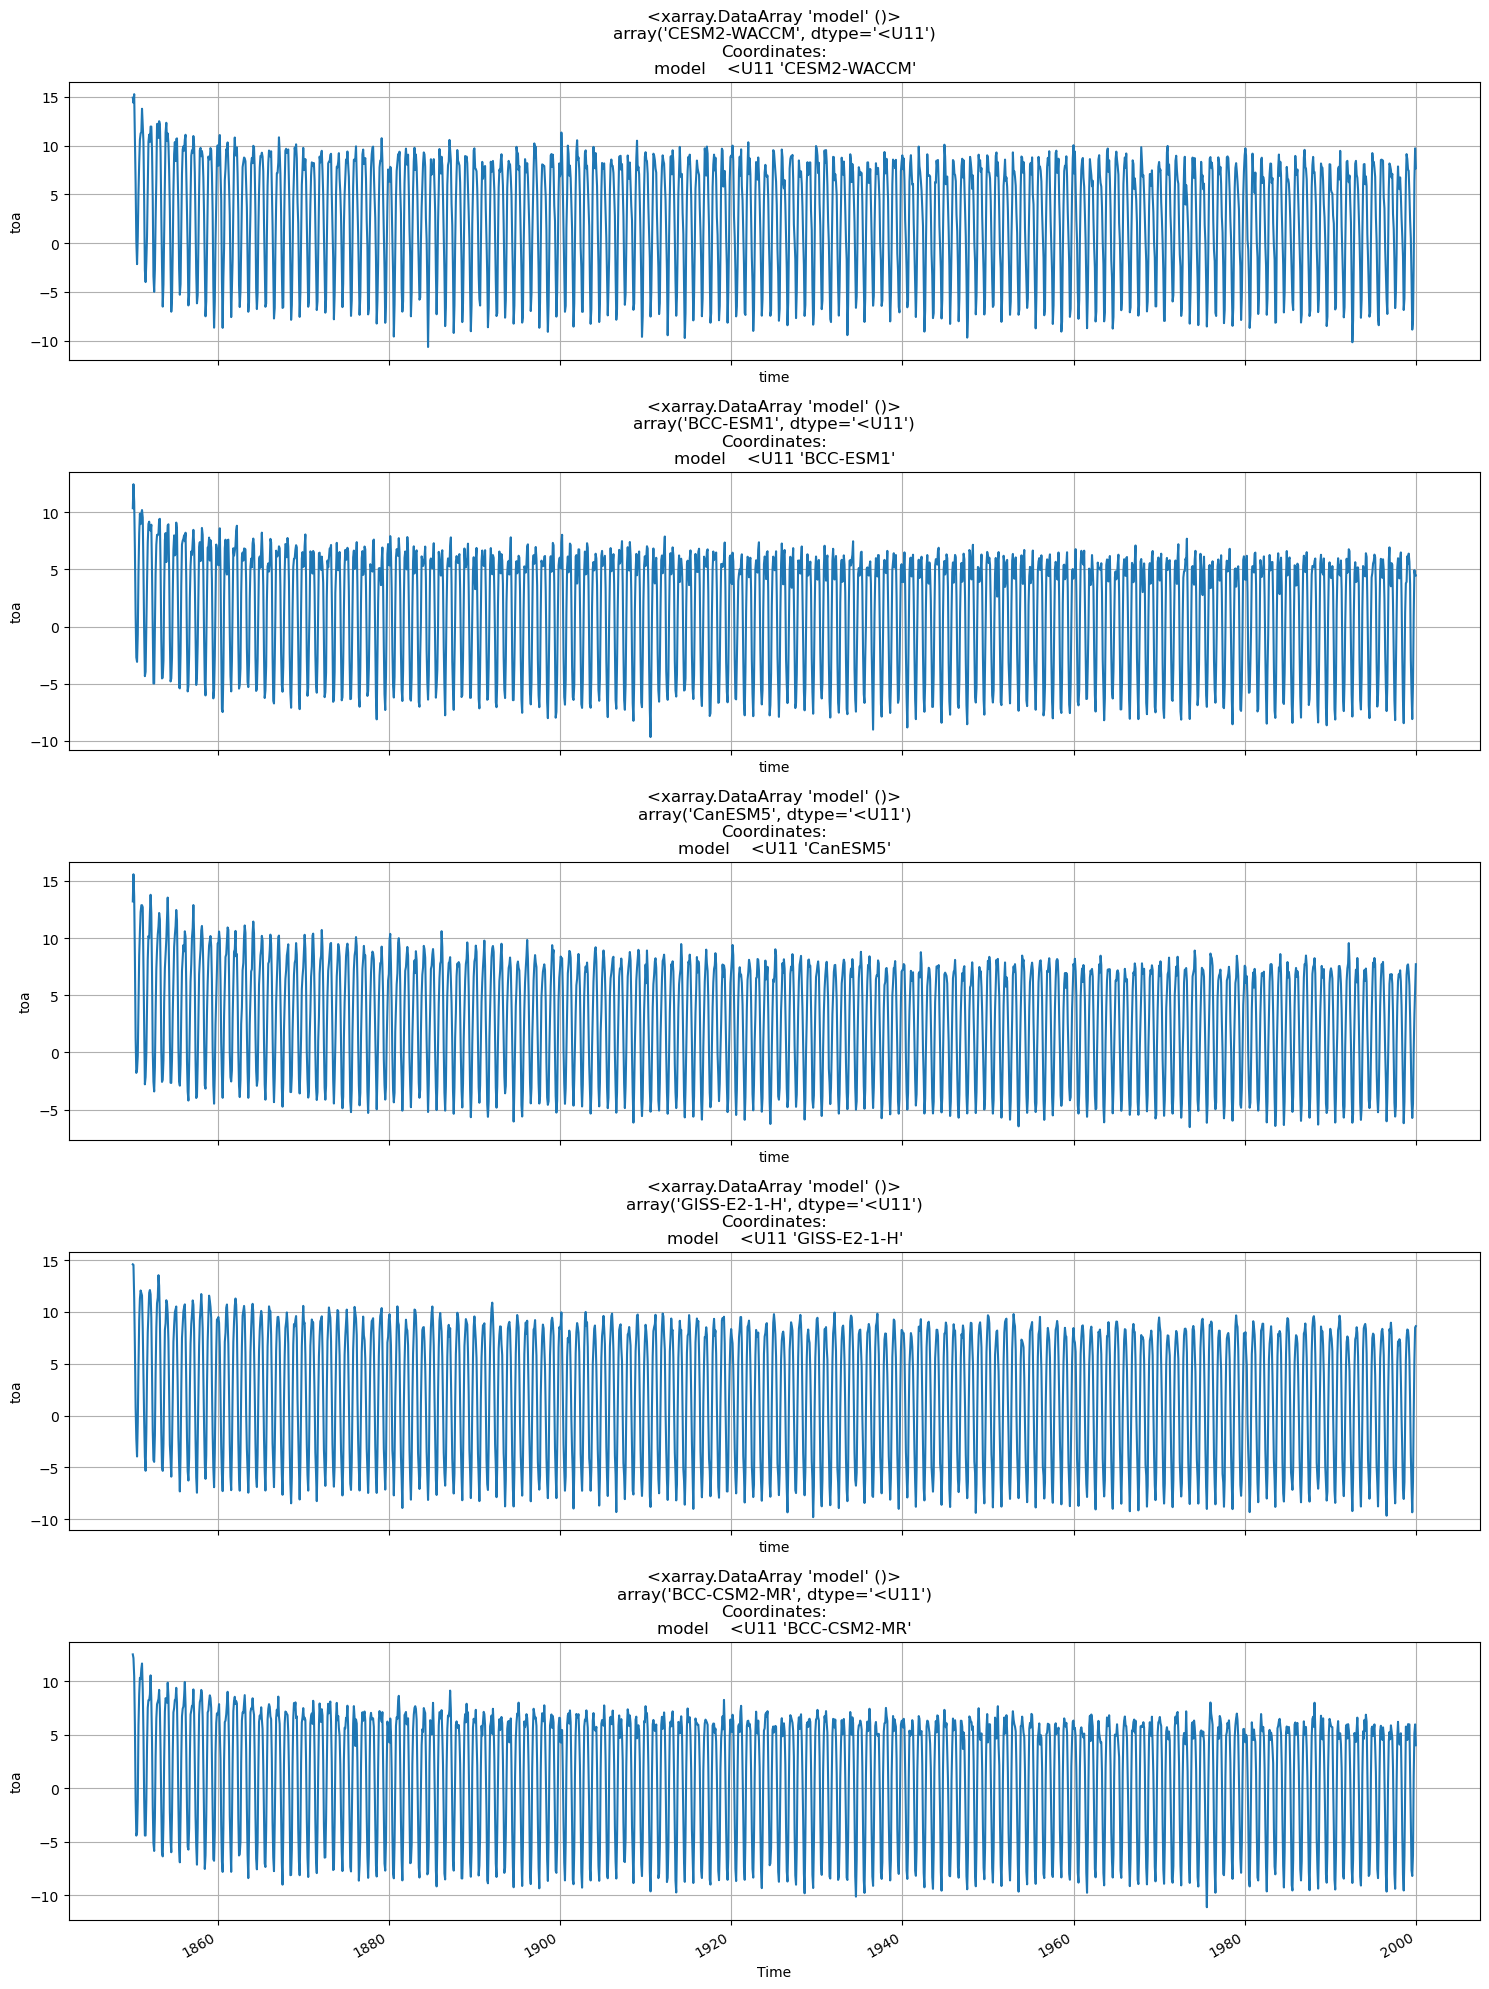

In [53]:
#TOA PLOTS
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
for i, model in enumerate(ds_abrupt_gcm_models.model): #enumerate returns iterator of pairs, each pair contains the index and the corresponding element from the iterable
    ds_abrupt_gcm_models.sel(model=model).toa.plot(ax=axs[i], label=model) #selects each model and the tas variable, plots over each axes
    axs[i].set_title(model) #shows what model number
    axs[i].set_ylabel('toa')
    axs[i].grid(True) #makes gridlines on plot
axs[-1].set_xlabel('Time') 
plt.tight_layout() #creates a better layout for subplots
plt.show()

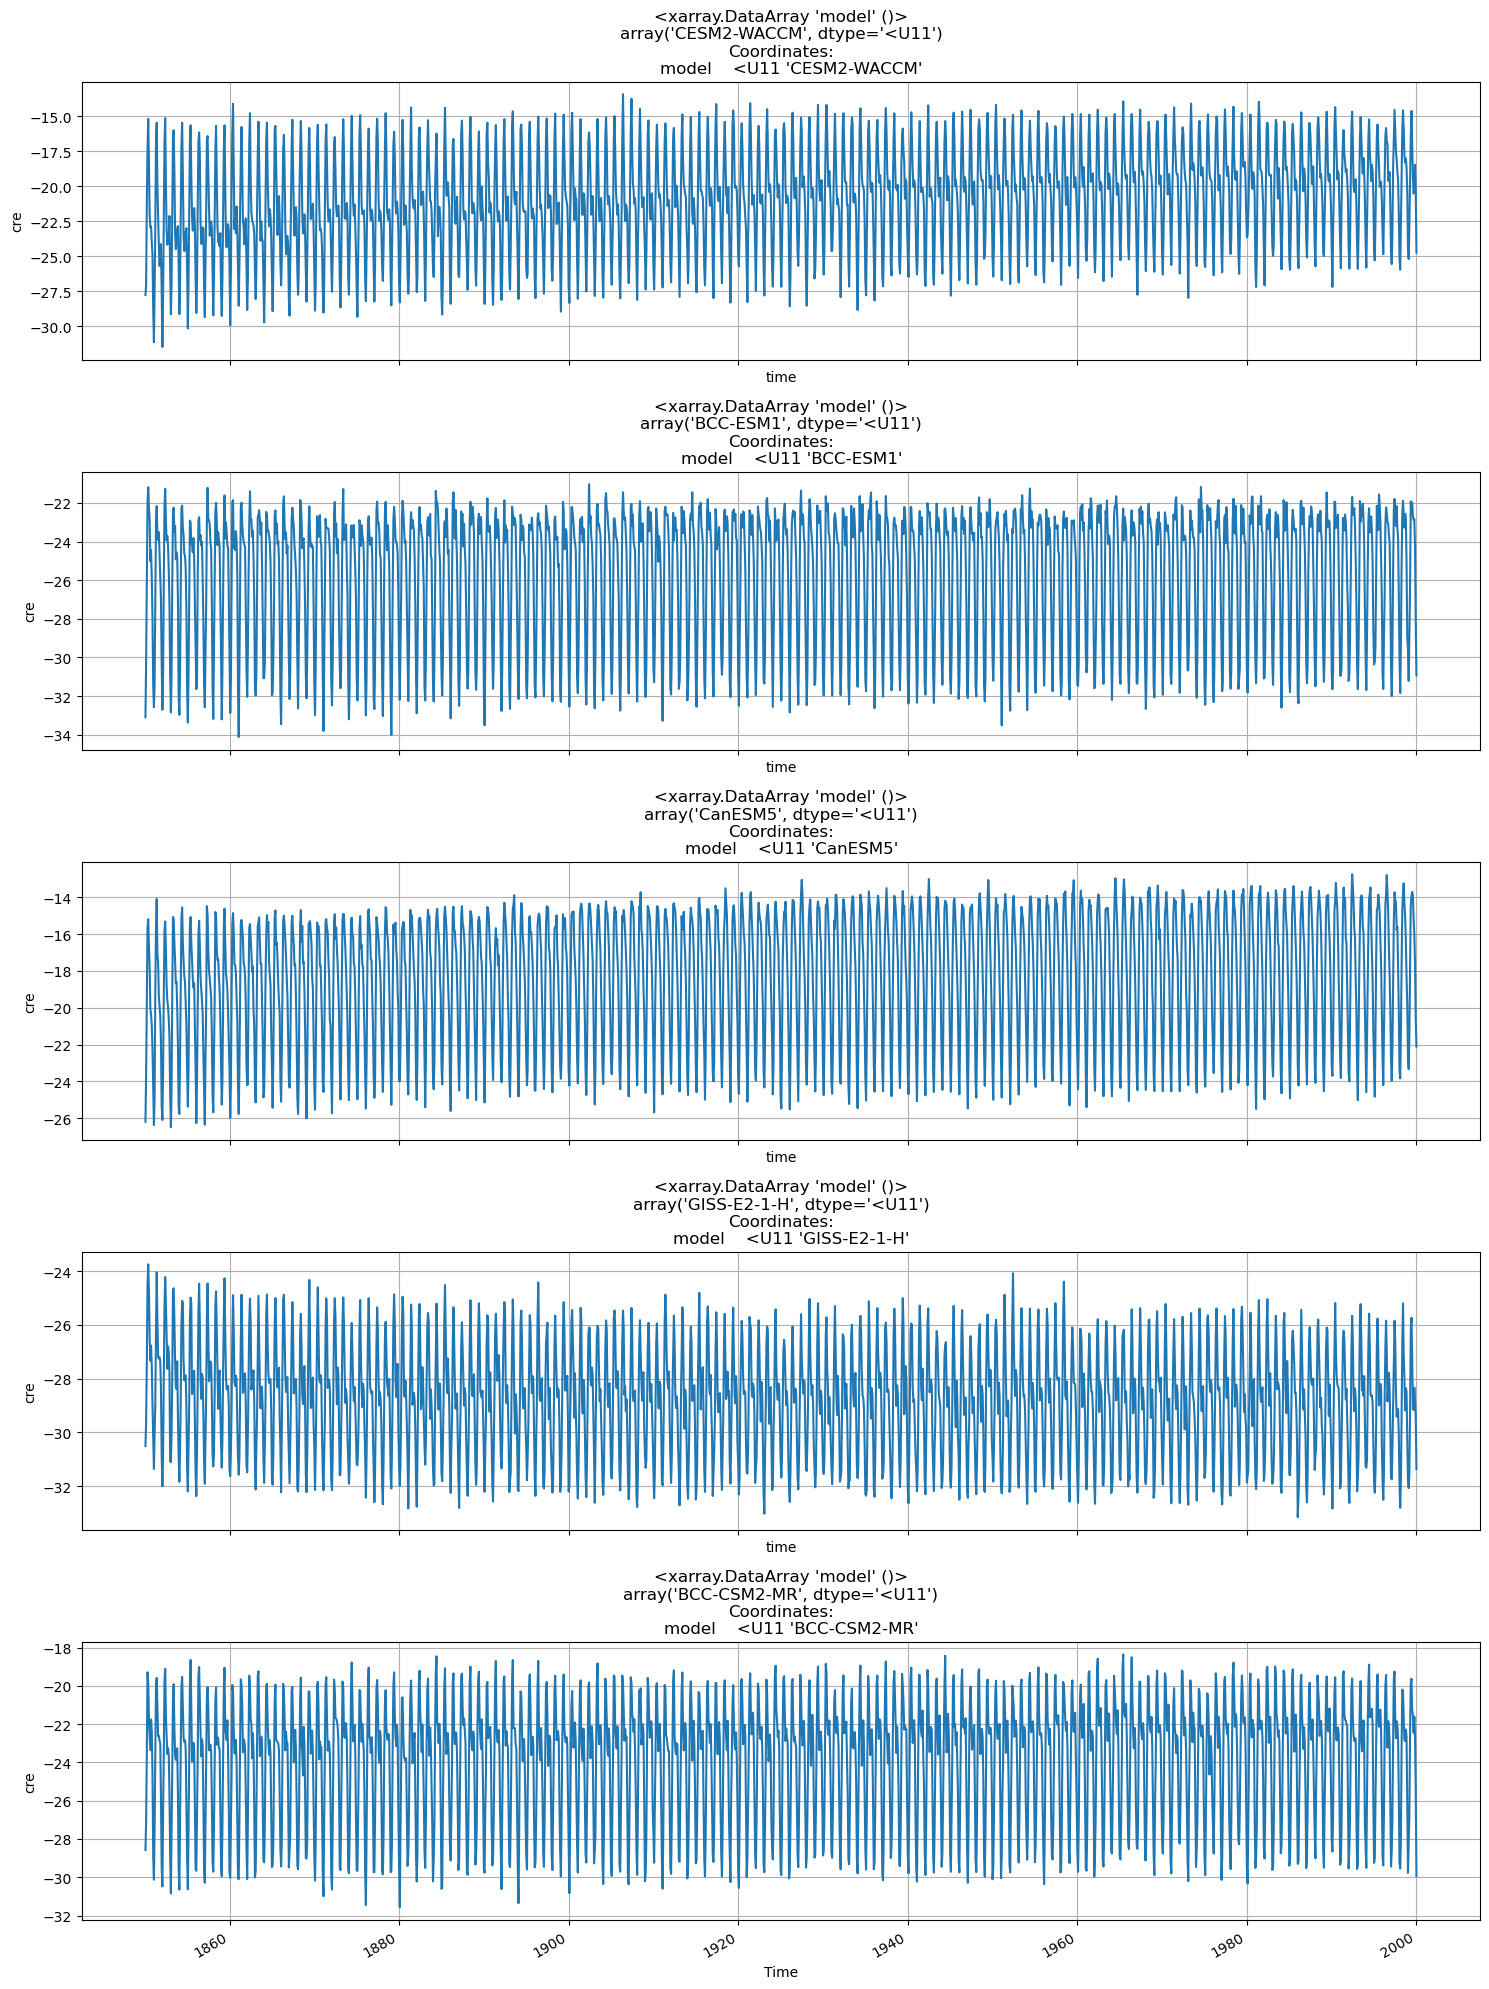

In [54]:
#CRE PLOTS
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
for i, model in enumerate(ds_abrupt_gcm_models.model): #enumerate returns iterator of pairs, each pair contains the index and the corresponding element from the iterable
    ds_abrupt_gcm_models.sel(model=model).cre.plot(ax=axs[i], label=model) #selects each model and the tas variable, plots over each axes
    axs[i].set_title(model) #shows what model number
    axs[i].set_ylabel('cre')
    axs[i].grid(True) #makes gridlines on plot
axs[-1].set_xlabel('Time') 
plt.tight_layout() #creates a better layout for subplots
plt.show()

#### Adding in 4 More Models

In [55]:
ds_abrupt_list_4_models = list()
ds_piControl_list_4_models = list()
#abrupt data
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")

#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
#toa and cre variable
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#piControl data
df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id == 'CNRM-CM6-1-HR' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")

#load piControl data as dataset
ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
#toa and cre variable
ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

#weights for toa and cre (combine at the end)
weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

#ds_toa combined
ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
#piControl combined
ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
#slice and assign
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
ds_abrupt_list_4_models.append(ds_abrupt4xCO2_toa_cre_merged)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
ds_piControl_list_4_models.append(ds_piControl_toa_cre_merged)

In [56]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==   'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==   'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")

#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
#toa and cre variable
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#piControl data
df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id ==  'MIROC-ES2L' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")

#load piControl data as dataset
ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
#toa and cre variable
ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

#weights for toa and cre (combine at the end)
weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

#ds_toa combined
ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
#piControl combined
ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
#slice and assign
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
ds_abrupt_list_4_models.append(ds_abrupt4xCO2_toa_cre_merged)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
ds_piControl_list_4_models.append(ds_piControl_toa_cre_merged)

C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\codin

In [57]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==    'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==    'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")

#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
#toa and cre variable
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#piControl data
df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id ==   'CNRM-ESM2-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")

#load piControl data as dataset
ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
#toa and cre variable
ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

#weights for toa and cre (combine at the end)
weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

#ds_toa combined
ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
#piControl combined
ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
#slice and assign
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
ds_abrupt_list_4_models.append(ds_abrupt4xCO2_toa_cre_merged)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
ds_piControl_list_4_models.append(ds_piControl_toa_cre_merged)

In [58]:
#abrupt4xCO2 data
df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id ==     'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")
df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id ==     'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f2'")

#load abrupt4xCO2 data as dataset
ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
#toa and cre variable
ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

#piControl data
df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")
df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id ==    'CNRM-CM6-1' & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f2'")

#load piControl data as dataset
ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
#toa and cre variable
ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

#weights for toa and cre (combine at the end)
weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

#ds_toa combined
ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
#piControl combined
ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
#slice and assign
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
ds_abrupt_list_4_models.append(ds_abrupt4xCO2_toa_cre_merged)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
ds_piControl_list_4_models.append(ds_piControl_toa_cre_merged)

C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\

In [61]:
ds_abrupt_4_models = xr.concat(ds_abrupt_list_4_models, dim = 'model', coords = 'minimal', compat='override')
ds_abrupt_4_models

<xarray.Dataset>
Dimensions:  (time: 1800, model: 4)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 1999-12-31
  * model    (model) <U11 'BCC-CSM2-MR' 'BCC-CSM2-MR' ... 'BCC-CSM2-MR'
Data variables:
    toa      (model, time) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>
    cre      (model, time) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>

In [60]:
ds_piControl_4_models = xr.concat(ds_piControl_list_4_models, dim = 'model', coords = 'minimal', compat='override')
ds_piControl_4_models

<xarray.Dataset>
Dimensions:  (time: 1800, model: 4)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 1999-12-31
  * model    (model) <U11 'BCC-CSM2-MR' 'BCC-CSM2-MR' ... 'BCC-CSM2-MR'
Data variables:
    toa      (model, time) float64 dask.array<chunksize=(1, 76), meta=np.ndarray>
    cre      (model, time) float64 dask.array<chunksize=(1, 76), meta=np.ndarray>

In [62]:
#r1i1p1f1 models
ds_list_abrupt = list()
ds_list_piControl = list()
for source in source_list_abrupt4xCO2_2:
    #abrupt4xCO2 data
    df_toa_abrupt4xCO2_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")
    df_toa_abrupt4xCO2_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'abrupt-4xCO2' & member_id == 'r1i1p1f1'")

    #load abrupt4xCO2 data as dataset
    ds_toa_abrupt4xCO2_rlut = load_zarr_dset(df_toa_abrupt4xCO2_rlut)
    ds_toa_abrupt4xCO2_rsut = load_zarr_dset(df_toa_abrupt4xCO2_rsut)
    ds_toa_abrupt4xCO2_rsdt = load_zarr_dset(df_toa_abrupt4xCO2_rsdt)
    ds_toa_abrupt4xCO2_rlutcs = load_zarr_dset(df_toa_abrupt4xCO2_rlutcs)
    ds_toa_abrupt4xCO2_rsutcs = load_zarr_dset(df_toa_abrupt4xCO2_rsutcs)
    #toa and cre variable
    ds_abrupt4xCO2_toa = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rsut.rsut - ds_toa_abrupt4xCO2_rlut.rlut
    ds_abrupt4xCO2_toacs = ds_toa_abrupt4xCO2_rsdt.rsdt - ds_toa_abrupt4xCO2_rlutcs.rlutcs - ds_toa_abrupt4xCO2_rsutcs.rsutcs
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_toa - ds_abrupt4xCO2_toacs

    #check each coords to see if lat/latitude need to be renamed
    #print(source)
    #print(ds_abrupt4xCO2_toa.coords)

    #piControl data
    df_toa_piControl_rlut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlut' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsut = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsut' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsdt = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsdt' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rlutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rlutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")
    df_toa_piControl_rsutcs = df.query("activity_id =='CMIP' & source_id == @source & table_id == 'Amon' & variable_id == 'rsutcs' & experiment_id == 'piControl' & member_id == 'r1i1p1f1'")

    #load piControl data as dataset
    ds_toa_piControl_rlut = load_zarr_dset(df_toa_piControl_rlut)
    ds_toa_piControl_rsut = load_zarr_dset(df_toa_piControl_rsut)
    ds_toa_piControl_rsdt = load_zarr_dset(df_toa_piControl_rsdt)
    ds_toa_piControl_rlutcs = load_zarr_dset(df_toa_piControl_rlutcs)
    ds_toa_piControl_rsutcs = load_zarr_dset(df_toa_piControl_rsutcs)
    #toa and cre variable
    ds_piControl_toa = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rsut.rsut - ds_toa_piControl_rlut.rlut
    ds_piControl_toacs = ds_toa_piControl_rsdt.rsdt - ds_toa_piControl_rlutcs.rlutcs - ds_toa_piControl_rsutcs.rsutcs
    ds_piControl_cre = ds_piControl_toa - ds_piControl_toacs

    #check coords for piControl to see if lat/latitude need to be renamed
    #print(source)
    #print(ds_piControl_toa.coords)
    
    #weights for toa and cre (combine at the end)
    weights_toa_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_toa.lat))
    weights_cre_abrupt = np.cos(np.deg2rad(ds_abrupt4xCO2_cre.lat))
    ds_abrupt4xCO2_toa = ds_abrupt4xCO2_toa.weighted(weights_toa_abrupt).mean(dim=('lon', 'lat'))
    ds_abrupt4xCO2_cre = ds_abrupt4xCO2_cre.weighted(weights_cre_abrupt).mean(dim=('lon', 'lat'))
    weights_toa_piControl = np.cos(np.deg2rad(ds_piControl_toa.lat))
    weights_cre_piControl = np.cos(np.deg2rad(ds_piControl_cre.lat))
    ds_piControl_toa = ds_piControl_toa.weighted(weights_toa_piControl).mean(dim=('lon', 'lat'))
    ds_piControl_cre = ds_piControl_cre.weighted(weights_cre_piControl).mean(dim=('lon', 'lat'))

    #ds_toa combined
    ds_abrupt4xCO2_toa_cre_merged = xr.Dataset({'toa':ds_abrupt4xCO2_toa, 'cre': ds_abrupt4xCO2_cre})
    #piControl combined
    ds_piControl_toa_cre_merged = xr.Dataset({'toa':ds_piControl_toa, 'cre':ds_piControl_toa})
    
    #slice and assign
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.isel(time=slice(0,1800))
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign(time=new_time_index_abrupt)
    ds_abrupt4xCO2_toa_cre_merged = ds_abrupt4xCO2_toa_cre_merged.assign_coords(model=source)
    ds_list_abrupt_gcm.append(ds_abrupt4xCO2_toa_cre_merged)
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.isel(time=slice(0,1800))
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign(time=new_time_index_abrupt)
    ds_piControl_toa_cre_merged = ds_piControl_toa_cre_merged.assign_coords(model=source)
    ds_list_piControl_gcm.append(ds_piControl_toa_cre_merged)
    
ds_abrupt_models = xr.concat(ds_list_abrupt, dim = 'model', coords = 'minimal', compat = 'override')
ds_piControl_models = xr.concat(ds_list_piControl, dim = 'model', coords = 'minimal', compat = 'override')
ds_abrupt_gcm_models


C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\coding\times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\core\indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
C:\Users\panda\miniconda3\envs\temp_var\Lib\site-packages\xarray\codin

ValueError: conflicting sizes for dimension 'time': length 120 on 'toa' and length 1800 on {'time': 'time'}

In [ ]:
ds_piControl_models